# Experimento 1 - Eficácia da Personalização

**Objetivo**: Avaliar se a etapa de personalização (Tailor) torna as respostas mais úteis, claras e alinhadas ao perfil do usuário, utilizando exclusivamente modelos de linguagem de grande porte (LLMs) como avaliadores automáticos.

**Metodologia**
* Escolher 3 perfis de usuário,
  * Para cada perfil, elaborar 10 perguntas,
    * Para cada pergunda, responder com e sem o módulo de personalização.
    * Submeter o par de respostas (com e sem o módulo de personalização) à LLM avaliadora.

Critérios de avaliação da LLM:
* UtilidadeGeral,
* Alinhamento com o Perfil,
* Clareza na Comunicação,
* Personalização Perceptível

Cada critério foi aplicado 20 vezes para cada resposta e uma média foi calculada.

## Critérios de Avaliação

| Nome                       | Objetivo claro                                                    | Base comparável                        |
|----------------------------|--------------------------------------------------------------------|----------------------------------------|
| `FocoRelevanteAoPerfil`    | Verifica se os dados mencionados foram bem escolhidos              | Usa inferência a partir do contexto    |
| `AdequacaoDeLinguagemAoPerfil` | Testa se o tom e vocabulário mudam conforme o público             | Linguística e tom textual              |
| `OrganizacaoTextualEClareza`   | Avalia se a estrutura facilita compreensão                        | Permite análise objetiva de parágrafos |
| `PersonalizacaoDetectavel`     | Verifica se há sinais explícitos de customização                   | Verificável por qualquer LLM           |

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel

In [3]:
# Substitua o caminho abaixo se necessário
with open("/Users/gustavolgcr/doutorado/implementacoes/experiments/src/results/evaluation_results_with_repetitions_experiment_1.json", "r", encoding="utf-8") as f:
    resultados = json.load(f)

# Expandir para um DataFrame
linhas = []
for item in resultados:
    for i in range(len(item["scores_resposta_padrao"])):
        linhas.append({
            "pergunta": item["pergunta"],
            "perfil": item["perfil"],
            "criterio": item["criterio"],
            "repeticao": i + 1,
            "score_padrao": item["scores_resposta_padrao"][i],
            "score_personalizada": item["scores_resposta_personalizada"][i]
        })

df = pd.DataFrame(linhas)
df.head()

,pergunta,perfil,criterio,repeticao,score_padrao,score_personalizada
0,Bruno Pacheco foi bem no jogo contra o Ceará n...,Torcedor do Time,UtilidadeGeral,1,8.62,9.93
1,Bruno Pacheco foi bem no jogo contra o Ceará n...,Torcedor do Time,UtilidadeGeral,2,8.62,9.95
2,Bruno Pacheco foi bem no jogo contra o Ceará n...,Torcedor do Time,UtilidadeGeral,3,8.65,9.94
3,Bruno Pacheco foi bem no jogo contra o Ceará n...,Torcedor do Time,UtilidadeGeral,4,8.65,9.92
4,Bruno Pacheco foi bem no jogo contra o Ceará n...,Torcedor do Time,UtilidadeGeral,5,8.71,9.94


Os testes estatísticos (t pareado) realizados para todos os perfis indicaram diferenças altamente significativas (p < 0.0001) entre as respostas padrão e personalizadas em todos os critérios avaliados (Utilidade Geral, Alinhamento com o Perfil, Clareza na Comunicação e Personalização Perceptível). Esses resultados confirmam que a personalização das respostas gerou ganhos reais e consistentes, não atribuíveis ao acaso.

In [8]:
# Comparar médias e p-valores por critério e perfil
for perfil in df["perfil"].unique():
    print(f"Perfil: {perfil}")
    subset_perfil = df[df["perfil"] == perfil]
    resultados = []
    for criterio in subset_perfil["criterio"].unique():
        sub = subset_perfil[subset_perfil["criterio"] == criterio]
        stat, p = ttest_rel(sub["score_personalizada"], sub["score_padrao"])
        resultados.append({
            "Critério": criterio,
            "Média Padrão": round(sub["score_padrao"].mean(), 2),
            "Média Personalizada": round(sub["score_personalizada"].mean(), 2),
            "Valor-p": round(p, 4),
            "Significativo": "✅" if p < 0.05 else "❌"
        })
    display(pd.DataFrame(resultados))

Perfil: Torcedor do Time


,Critério,Média Padrão,Média Personalizada,Valor-p,Significativo
0,UtilidadeGeral,7.95,8.71,0.0,✅
1,AlinhamentoComOPerfil,6.90,8.27,0.0,✅
2,ClarezaNaComunicacao,7.92,8.55,0.0,✅
3,PersonalizacaoPerceptivel,6.93,8.51,0.0,✅


Perfil: Técnico do Time


,Critério,Média Padrão,Média Personalizada,Valor-p,Significativo
0,UtilidadeGeral,8.25,9.13,0.0,✅
1,AlinhamentoComOPerfil,7.71,8.86,0.0,✅
2,ClarezaNaComunicacao,8.62,8.97,0.0,✅
3,PersonalizacaoPerceptivel,8.16,9.02,0.0,✅


Perfil: Narrador do Jogo


,Critério,Média Padrão,Média Personalizada,Valor-p,Significativo
0,UtilidadeGeral,8.78,9.69,0.0,✅
1,AlinhamentoComOPerfil,7.41,8.85,0.0,✅
2,ClarezaNaComunicacao,8.78,9.40,0.0,✅
3,PersonalizacaoPerceptivel,7.19,8.89,0.0,✅


In [25]:
# Agrupar por critério
df_agg = df.groupby("criterio")[["score_padrao", "score_personalizada"]].agg(["mean", "std"]).round(2)
df_agg.columns = ['Padrão_Média', 'Padrão_DP', 'Personalizada_Média', 'Personalizada_DP']
df_agg["Ganho (%)"] = ((df_agg["Personalizada_Média"] - df_agg["Padrão_Média"]) / df_agg["Padrão_Média"] * 100).round(2)
df_agg.reset_index(inplace=True)
df_agg

,criterio,Padrão_Média,Padrão_DP,Personalizada_Média,Personalizada_DP,Ganho (%)
0,AlinhamentoComOPerfil,7.34,2.03,8.66,1.70,17.98
1,ClarezaNaComunicacao,8.44,1.85,8.97,1.83,6.28
2,PersonalizacaoPerceptivel,7.43,1.85,8.81,1.64,18.57
3,UtilidadeGeral,8.33,2.12,9.18,1.87,10.20


Sobre o desvio padrão alto no gráfico abaixo:

1.	Alta variabilidade entre execuções do GEval: como cada pontuação foi obtida a partir de múltiplas execuções com LLMs (por exemplo, 20 repetições), é possível que a variação entre essas respostas tenha sido alta. Isso pode acontecer se:
  * O modelo de avaliação for sensível ao wording da resposta.
  * A resposta analisada tiver ambiguidade ou estrutura que permite múltiplas interpretações.
2. Menor consistência da LLM avaliadora: alguns critérios são mais subjetivos (como Alinhamento com o Perfil ou Personalização Perceptível), e modelos como o GPT podem variar levemente de julgamento entre execuções. Mesmo pequenas variações nas frases da resposta podem gerar variações de pontuação.
3. Limitação das escalas de avaliação: embora a escala vá de 0 a 10, os intervalos avaliativos podem não ser linearmente percebidos pela LLM, o que pode ampliar a dispersão numérica entre respostas similares.

Talvez não seja necessariamente um problema, já que os p-values estão mostrando uma diferença média significativa.


<span style="color:red">*Fazer o mesmo gráfico separado por perfil*.</span>


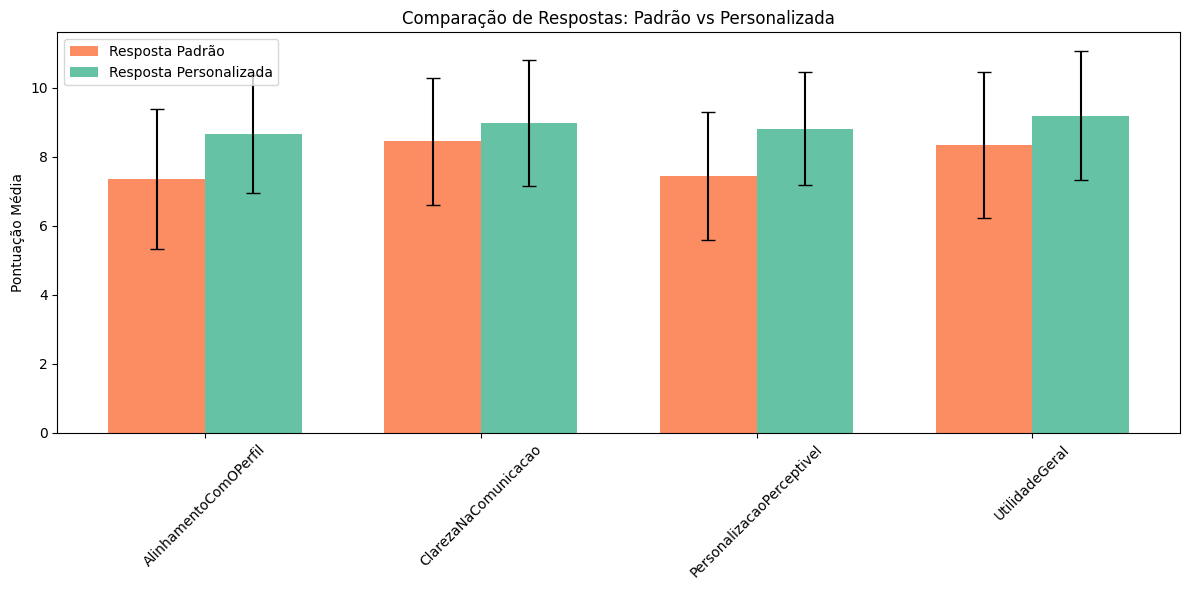

In [6]:
# Gráfico de barras com desvio padrão
x = range(len(df_agg))
largura = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar([i - largura/2 for i in x], df_agg["Padrão_Média"], yerr=df_agg["Padrão_DP"], width=largura, capsize=5, label="Resposta Padrão", color="#fc8d62")
ax.bar([i + largura/2 for i in x], df_agg["Personalizada_Média"], yerr=df_agg["Personalizada_DP"], width=largura, capsize=5, label="Resposta Personalizada", color="#66c2a5")

ax.set_xticks(x)
ax.set_xticklabels(df_agg["criterio"], rotation=45)
ax.set_ylabel("Pontuação Média")
ax.set_title("Comparação de Respostas: Padrão vs Personalizada")
ax.legend()
plt.tight_layout()
plt.show()

Observa-se que, em todos os critérios, as caixas referentes às respostas personalizadas apresentam medianas superiores às das respostas padrão, com menor dispersão e menos presença de outliers negativos. Este padrão reforça a hipótese de que o processo de personalização, baseado no perfil do usuário e no uso consciente das observações factuais, contribui para respostas mais bem avaliadas.


<span style="color:red">*Fazer o mesmo gráfico separado por perfil*.</span>

<span style="color:red">*Fazer uma análise dos outliers*.</span>

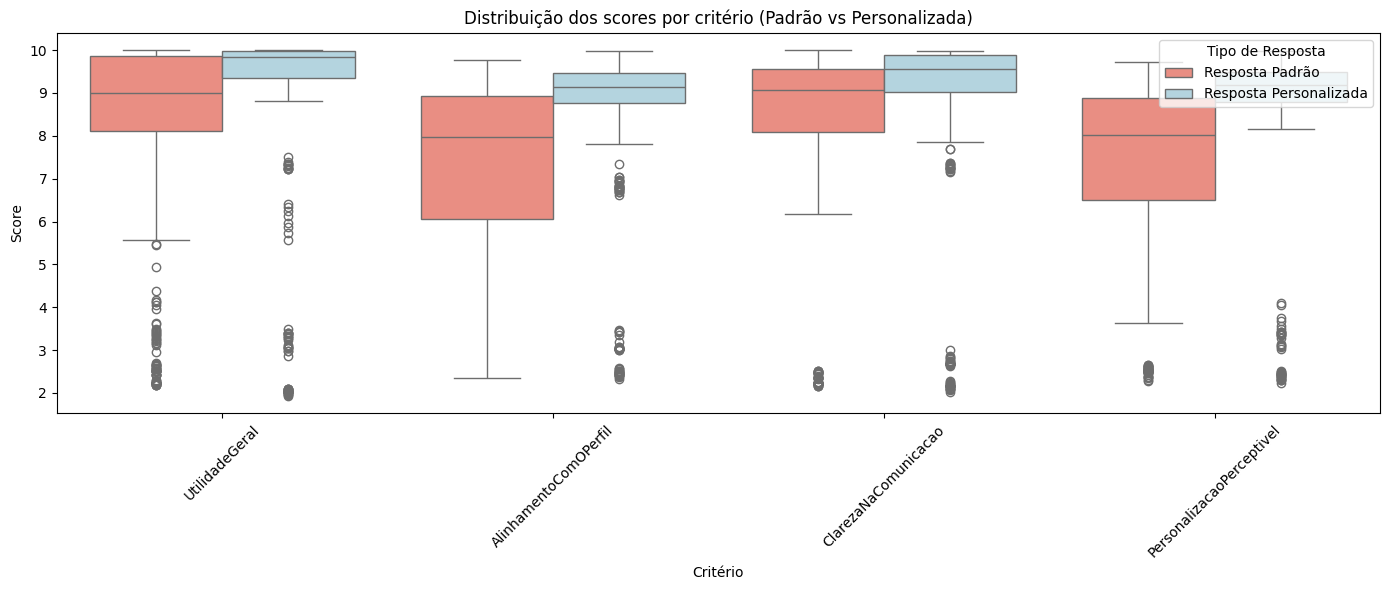

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que você tenha um DataFrame df com as colunas: ['criterio', 'score_padrao', 'score_personalizada']

# Reformata o DataFrame para formato longo
df_longo = pd.melt(
    df,
    id_vars=["criterio"],
    value_vars=["score_padrao", "score_personalizada"],
    var_name="tipo",
    value_name="score"
)

# Renomeia os tipos para deixar mais legível na legenda
df_longo["tipo"] = df_longo["tipo"].map({
    "score_padrao": "Resposta Padrão",
    "score_personalizada": "Resposta Personalizada"
})

# Cria o boxplot com legenda e boxes lado a lado
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_longo, x="criterio", y="score", hue="tipo", palette={"Resposta Padrão": "salmon", "Resposta Personalizada": "lightblue"})
plt.title("Distribuição dos scores por critério (Padrão vs Personalizada)")
plt.ylabel("Score")
plt.xlabel("Critério")
plt.xticks(rotation=45)
plt.legend(title="Tipo de Resposta", loc="upper right")
plt.tight_layout()
plt.show()

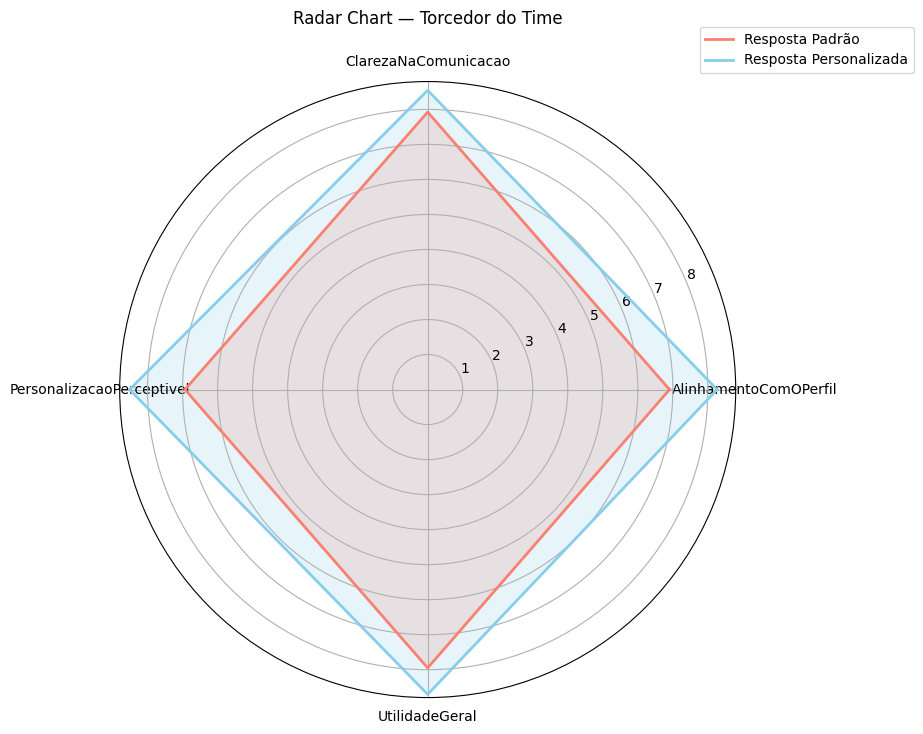

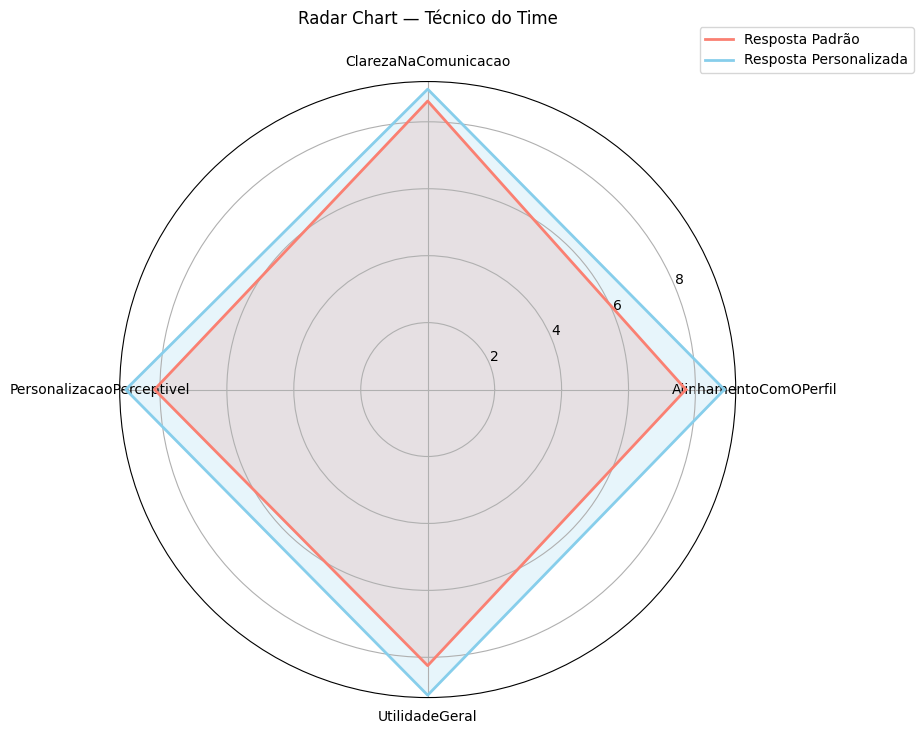

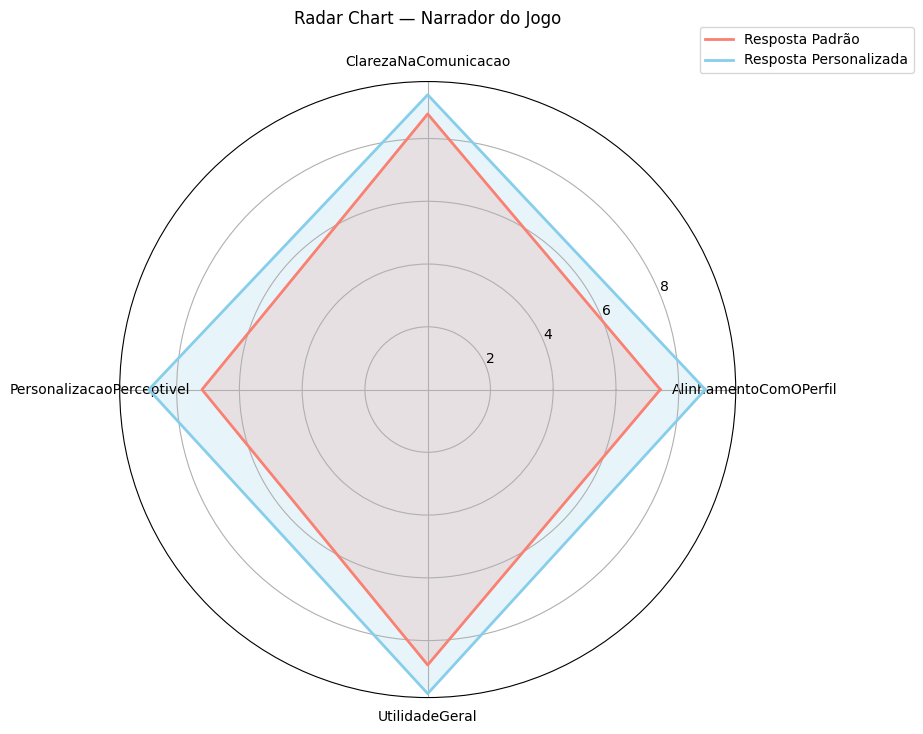

In [37]:
def plot_radar_chart_por_perfil(df, perfil):
    # Filtra pelo perfil desejado
    df_perfil = df[df["perfil"] == perfil]

    # Calcula a média por critério
    agg = df_perfil.groupby("criterio")[["score_padrao", "score_personalizada"]].mean().reset_index()

    # Preparar categorias e valores
    categorias = agg["criterio"].tolist()
    valores_padrao = agg["score_padrao"].tolist()
    valores_personalizada = agg["score_personalizada"].tolist()

    # Ângulos (sem duplicar categoria aqui ainda)
    num_vars = len(categorias)
    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += [angles[0]]  # Fechar o círculo

    # Adicionar o primeiro valor ao final para fechar o radar
    valores_padrao += [valores_padrao[0]]
    valores_personalizada += [valores_personalizada[0]]

    # Criar figura
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Plotar
    ax.plot(angles, valores_padrao, label="Resposta Padrão", linewidth=2, color="salmon")
    ax.fill(angles, valores_padrao, alpha=0.2, color="salmon")

    ax.plot(angles, valores_personalizada, label="Resposta Personalizada", linewidth=2, color="skyblue")
    ax.fill(angles, valores_personalizada, alpha=0.2, color="skyblue")

    # Labels
    ax.set_xticks(angles[:-1])  # Retira o último (duplicado)
    ax.set_xticklabels(categorias, fontsize=10)

    ax.set_title(f"Radar Chart — {perfil}", y=1.08)
    ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))

    plt.show()
    
# Exemplo de uso:
plot_radar_chart_por_perfil(df, perfil="Torcedor do Time")
plot_radar_chart_por_perfil(df, perfil="Técnico do Time")
plot_radar_chart_por_perfil(df, perfil="Narrador do Jogo")

In [27]:
vitorias = df[df["score_personalizada"] > df["score_padrao"]]
taxa = len(vitorias) / len(df)
print(f"A resposta personalizada venceu em {taxa:.0%} dos casos.")

A resposta personalizada venceu em 90% dos casos.


# Análise qualitativa com exemplos selecionados

**Perfil:** Torcedor  
**Pergunta:** Bruno Pacheco foi bem no jogo contra o Ceará no dia 1º de abril de 2023 ou deixou a desejar?

🔸 **Resposta padrão:**  
> Bruno Pacheco teve uma média de velocidade de 1.36 m/s, uma média de aceleração de -0.0077 m/s² e realizou 0.36 sprints. Esses números indicam um desempenho abaixo do esperado, sugerindo que ele deixou a desejar no jogo contra o Ceará.

🔹 **Resposta personalizada:**  
> Bruno Pacheco teve um desempenho que pode ser considerado abaixo do esperado no jogo contra o Ceará em 1º de abril de 2023. Ele apresentou uma média de velocidade de 1.36 m/s, o que indica uma movimentação limitada em campo. Além disso, sua média de aceleração foi de -0.0077 m/s², sugerindo dificuldades em ganhar velocidade rapidamente. O número de sprints, que foi de apenas 0.36, também reforça a ideia de que ele não conseguiu se destacar na partida. Como torcedor, é compreensível que você esperasse mais dele, e esses dados mostram que ele deixou a desejar nesse confronto.

🎯 **Análise:** A resposta personalizada utiliza tom empático, vocabulário voltado ao torcedor e interpreta os dados de forma mais acessível.

# Problemas

Talvez os critérios ainda não estejam bons.